In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Batch Time Tests.csv")

df

,Target Size,Initial Size (Bytes),Compressed Size (Bytes),Compression %,Records,Initial Bytes per Record,Compressed Bytes per Record,Records per Thread,Job Time (sec),Estimated Cost ($),Data Load Time (sec),Tokenization Time (sec),Embedding Time (sec),Execution Time (sec),AWS Time
0,10 KB,12729,7146,56.139524,60,212.150000,119.100000,4.000000,34,0.011,0.10,5.83,0.31,10.17,23.83
1,100 KB,118105,45951,38.906905,604,195.538080,76.077815,40.266667,35,0.011,0.12,7.46,0.89,12.25,22.75
2,500 KB,582015,213785,36.731871,3023,192.528945,70.719484,201.533333,45,0.015,0.11,11.29,5.04,20.35,24.65
3,1 MB,1154888,429745,37.210968,6216,185.792793,69.135296,414.400000,46,0.015,0.09,11.64,7.14,22.30,23.70
4,10 MB,11452461,4186779,36.557898,62161,184.238687,67.353791,4144.066667,161,0.053,0.17,88.16,45.65,138.55,22.45
5,100 MB,114356866,40748002,35.632318,621613,183.967945,65.552043,41440.866670,1219,0.400,0.72,768.15,416.40,1195.70,23.30
6,250 MB,284209238,100043417,35.200621,1554033,182.884944,64.376636,103602.200000,3523,1.156,1.67,1891.21,1588.02,3500.25,22.75
7,500 MB,570572545,199277704,34.925919,3108066,183.578002,64.116304,207204.400000,8099,2.657,2.07,3821.53,4215.97,8075.39,23.61
8,1 GB,1159456082,403142581,34.769974,6390184,181.443301,63.087789,426012.266700,20889,6.853,1.66,7684.09,13094.55,20863.75,25.25


In [3]:
features = [
    "Initial Size (Bytes)",
    "Compressed Size (Bytes)",
    "Records"
]
outcomes = [
    "Job Time (sec)",
    # "Data Load Time (sec)",
    # "Tokenization Time (sec)",
    # "Embedding Time (sec)",
    "Execution Time (sec)"
]

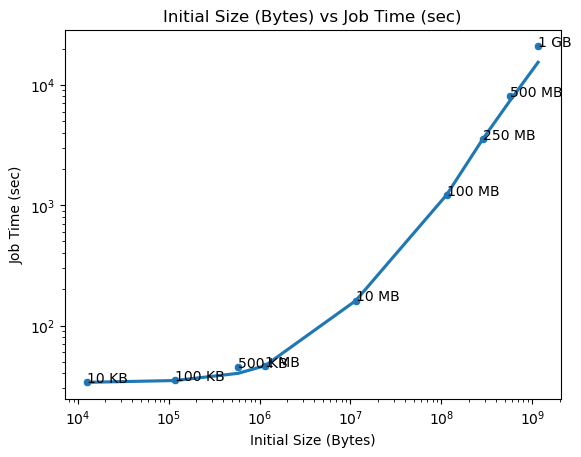

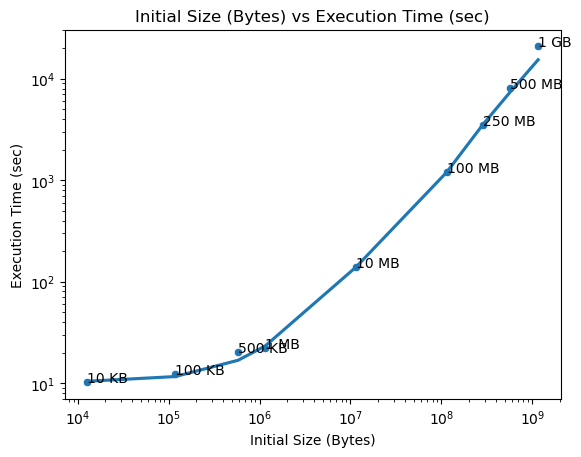

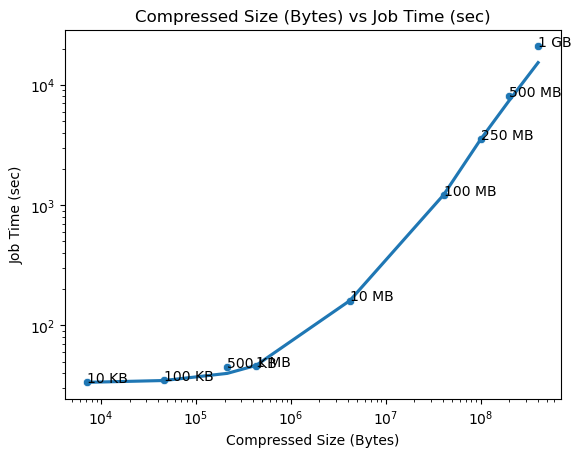

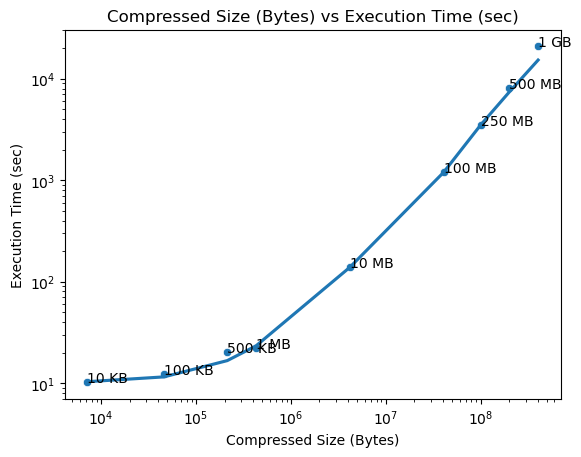

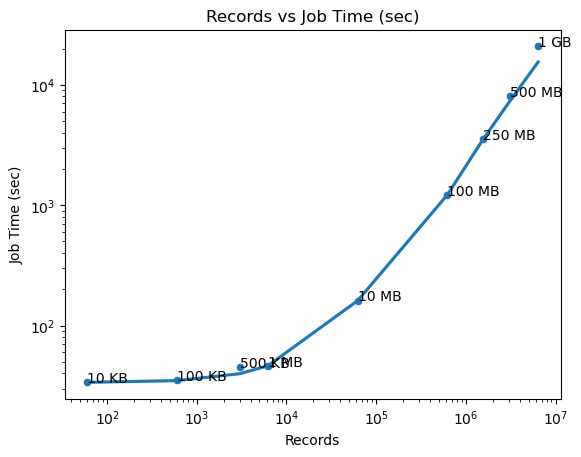

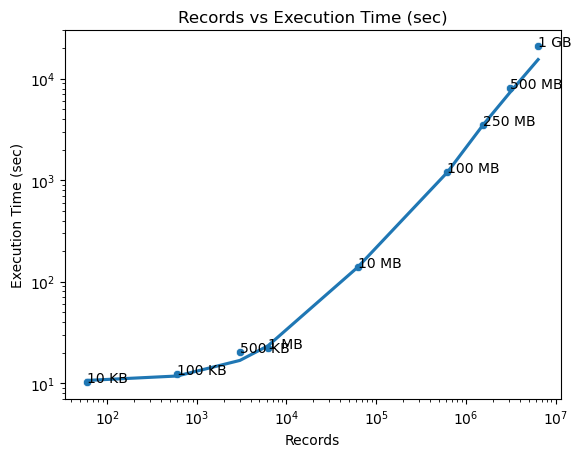

In [5]:
for feature in features:
    for outcome in outcomes:
        sns.scatterplot(
            df,
            x = feature,
            y = outcome
        )
        sns.regplot(
            df,
            x = feature,
            y = outcome,
            scatter = False,
            lowess = True
        )
        for i in range(len(df)):
            plt.annotate(df["Target Size"][i], (df[feature][i], df[outcome][i]))
        
        plt.title(f"{ feature } vs { outcome }")
        plt.xscale("log")
        plt.yscale("log")
        plt.show()

In [21]:
for feature in features:
    for outcome in outcomes:
        degree = 1
        terms = [feature]
        model_reduced = sm.OLS(df[outcome], sm.add_constant(df[[feature]])).fit()
        while True:
            degree += 1
            new_feature = f"{ feature }_{ degree }"
            df[new_feature] = df[feature] ** degree
            terms.append(new_feature)
            model_saturated = sm.OLS(df[outcome], sm.add_constant(df[terms])).fit()
            f_test = model_saturated.compare_f_test(model_reduced)
            if f_test[1] < 0.05:
                model_reduced = model_saturated
            else:
                model = model_reduced
                break
            
        print(f"Feature: { feature }, Outcome: { outcome }, Degree: { degree - 1 }")
        print(model.summary2())
        print()

Feature: Initial Size (Bytes), Outcome: Job Time (sec), Degree: 1
                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.984     
Dependent Variable:    Job Time (sec)     AIC:                  149.1564  
Date:                  2024-11-15 16:52   BIC:                  149.5508  
No. Observations:      9                  Log-Likelihood:       -72.578   
Df Model:              1                  F-statistic:          501.8     
Df Residuals:          7                  Prob (F-statistic):   8.93e-08  
R-squared:             0.986              Scale:                7.6065e+05
--------------------------------------------------------------------------
                       Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------
const                -368.6011 344.7742 -1.0691 0.3205 -1183.8625 446.6602
Initial Size (Bytes)    0.0000   0.0000 22.4017 0.0000  